#Import libraries

In [38]:
import tensorflow

In [39]:
tensorflow.__version__

'2.17.0'

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

#Downloading and loading MNIST dataset

In [41]:
(Xtrain,ytrain),(Xtest,ytest) = mnist.load_data()

Text(0.5, 1.0, 'Class: 5')

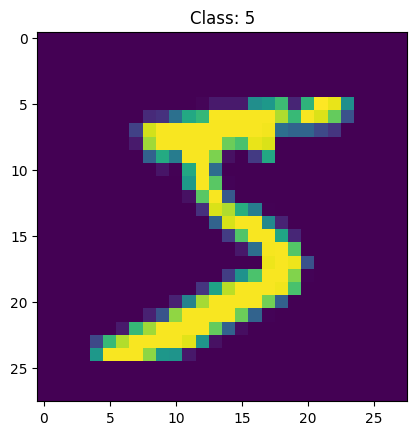

In [42]:
#Checking the first digit(sample) of the dataset

plt.imshow(Xtrain[0])
plt.title("Class: "+str(ytrain[0]))

In [43]:
Xtrain.shape

(60000, 28, 28)

In [44]:
Xtest.shape

(10000, 28, 28)

In [45]:
Xtrain=Xtrain.reshape(60000,28*28)    #Reshaping the split every digit to 1D array.
Xtrain.shape

(60000, 784)

In [46]:
Xtest=Xtest.reshape(10000,28*28)
Xtest.shape

(10000, 784)

In [47]:
Xtrain=Xtrain.astype('float32')       #Converting the integral type to float type for normalization
Xtest=Xtest.astype('float32')

In [48]:
Xtrain/=255                           #Normalizing for faster convergence and better training
Xtest/=255

In [49]:
Xtrain.min(),Xtrain.max()

(0.0, 1.0)

In [50]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [51]:
#Converting to categorical data(One Hot Encoding format)

ytrain=tensorflow.keras.utils.to_categorical(ytrain)
ytest=tensorflow.keras.utils.to_categorical(ytest)

In [52]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Neural Network Training

In [53]:
#Defining the neural network

network=Sequential()
network.add(Dense(input_shape=(784,),units=397,activation="relu"))  #First dense layer with 397 neurons
network.add(Dense(units=397,activation="relu"))                     #Second dense layer with 397 neurons
network.add(Dense(units=10,activation="softmax"))                   #Output layer with 10 neurons

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
#Compiling(configuring) the neural network for training

network.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [75]:
#Training the neural network model

history=network.fit(Xtrain,ytrain,epochs=10,batch_size=100)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9963 - loss: 0.0126
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9982 - loss: 0.0055
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9976 - loss: 0.0078
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9991 - loss: 0.0037
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9969 - loss: 0.0100
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9986 - loss: 0.0051
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9983 - loss: 0.0052
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9971 - loss: 0.0106
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9985 - loss: 0.0050
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9990 - loss: 0.0036


In [76]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

#Visualizing the accuracy and loss with epochs

Text(0, 0.5, 'Accuracy')

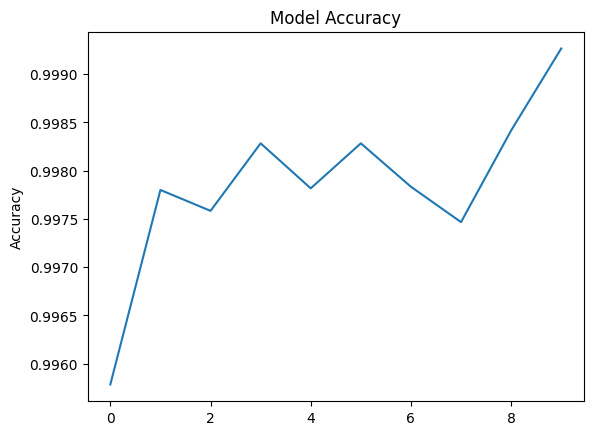

In [77]:
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

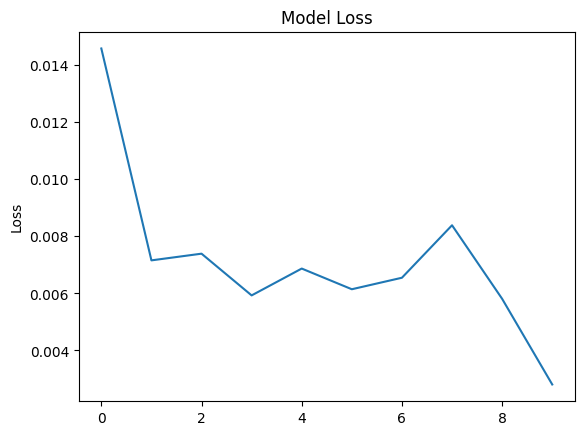

In [78]:
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")

#Model Evaluation

In [79]:
accuracy_test=network.evaluate(Xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9790 - loss: 0.1184


#Predictions

In [80]:
predictions=network.predict(Xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


#Predicting the first digit in the test split

In [81]:
print(predictions[0])         #Calculates the probability for each class

[3.6642002e-16 1.3293800e-17 5.7245680e-13 1.4616071e-13 1.1601949e-19
 7.1262489e-19 1.1798129e-22 9.9999994e-01 1.0394184e-16 4.6660072e-12]


In [82]:
np.argmax(predictions[0])     #Returns the index of the highest probability

7

Text(0.5, 1.0, 'Class: 7')

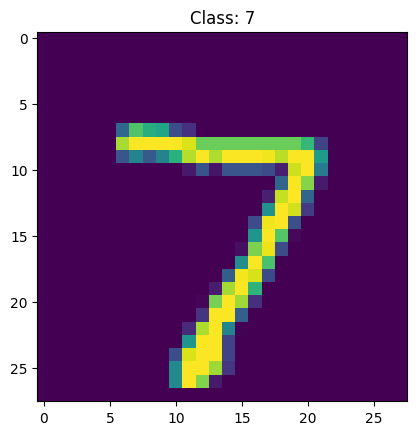

In [83]:
plt.imshow(Xtest[0].reshape(28,28))
plt.title("Class: "+str(np.argmax(predictions[0])))